In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import urllib.request


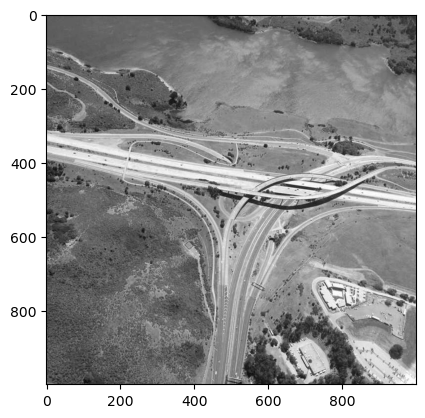

In [2]:
req = urllib.request.urlopen('https://picsum.photos/1000/1000.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
gray = gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")


In [3]:
def affineTransform(img, tMatrix):
  #print(T)
  Nr = img.shape[0]
  Nc = img.shape[1]
  img_transformed = np.zeros((Nr, Nc))
  for r in range(Nr):
    for c in range(Nc):
      cn = int(tMatrix[0, 0]*c + tMatrix[0, 1]*r + tMatrix[0, 2])
      rn = int(tMatrix[1, 0]*c + tMatrix[1, 1]*r + tMatrix[1, 2])
      if (rn >= 0 and cn >= 0 and rn < Nr and cn < Nc):
        img_transformed[rn, cn] = img[r, c]
  return img_transformed


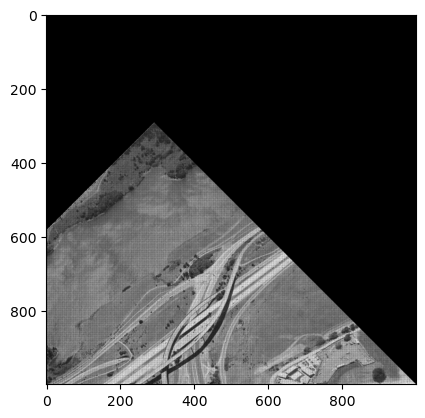

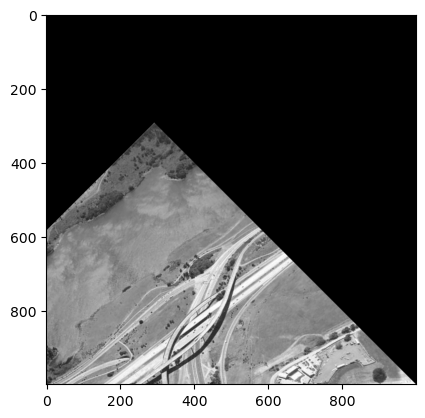

In [11]:
N = 1000
angle = -np.pi/4
rot = np.array([
    [np.cos(angle), -np.sin(angle),N - N*np.cos(angle) + N*np.sin(angle)],
    [np.sin(angle), np.cos(angle), N - N *np.sin(angle) - N*np.cos(angle)],
    [0, 0, 1]
])


scalado = affineTransform(gray, rot)
plt.imshow(scalado, cmap="gray")
plt.show()

T_AfinCV = rot.flatten()[:6].reshape(2, 3)
img_transformed = cv2.warpAffine(gray, T_AfinCV, (gray.shape))
plt.imshow(img_transformed, cmap="gray")
plt.show()


In [5]:
def bilinear(img, rn, cn):
  Nr = img.shape[0]
  Nc = img.shape[1]

  a = rn - int(rn)
  b = cn - int(cn)
  rn = int(rn)
  cn = int(cn)

  if rn < 0 or cn < 0 or rn > Nr - 2 or cn > Nc - 2:
      return 0
  if a == 0 and b == 0:
    return img[rn, cn]
  if rn == Nr - 1 and cn == Nc - 1:
    return img[rn, cn]
  if b == 0 or cn == Nc - 1:
    return (1 - a) * img[rn, cn] + a * img[rn + 1, cn]
  if a == 0 or rn == Nr - 1:
    return (1 - b) * img[rn, cn] + b * img[rn, cn + 1]
  y = (1 - a) * (1 - b) * img[rn, cn] + (1 - a) * b * img[rn, cn +
                                                          1] + a * (1 - b) * img[rn + 1, cn] + a * b * img[rn + 1, cn + 1]
  return y


In [6]:
rn = 1.5
cn = 2.8

img = np.array([
    [7,8,1,4,1],
    [10,11,5,3,4],
    [1,20,6,9,12],
    [13,1,15,14,0]
], dtype=np.float32)

print(bilinear(img,1.5,2.8))

5.9


[[ 7.  1.  1.  0.]
 [ 1.  6. 12.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


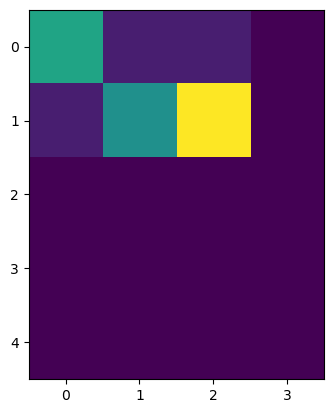

In [7]:
scaleMtx = np.array([
    [.5, 0, 0],
    [0, .5, 0],
    [0, 0, 1]
])

T_AfinCV = scaleMtx.flatten()[:6].reshape(2, 3)
img_transformed = cv2.warpAffine(img, T_AfinCV, (img.shape))
print(img_transformed)
plt.imshow(img_transformed)
plt.show()


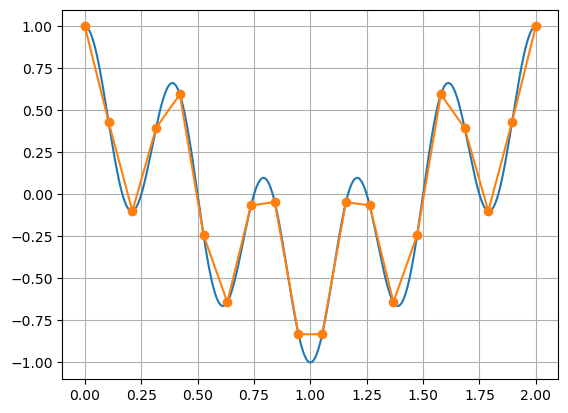

In [8]:
#Tiempo minimo y maximo

tmin = 0

tmax = 2

#Se define el tiempo de la segnal.

t = np.linspace(tmin, tmax, 1000)

#Se define la segnal de muestreo

x = np.cos(2*np.pi*t) * np.cos(3*np.pi*t)

t2 = np.linspace(tmin, tmax, 20)
x2 = np.cos(2*np.pi*t2) * np.cos(3*np.pi*t2)

#Se grafica el tiempo y la segnal.

plt.plot(t, x)
plt.plot(t2, x2, 'o-')
plt.grid()
